In [1]:
# === Step 1: Imports ===
import pandas as pd
from pathlib import Path
from glob import glob

# Opsional (bisa dipakai nanti kalau perlu)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# === Step 2: Configuration ===
# Sesuaikan daftar file di sini (bisa gunakan pola glob di bawah kalau mau otomatis)
INPUT_FILES = [
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_apr24-des24.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_aug23-apr24.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_dec22-aug23.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai.csv',
    
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai2.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai3.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai32.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_des22-aug23_pt2.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_aug23-apr24_pt2.csv',
    
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_apr24-des24_pt2.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_jan25-aug25.csv',
    '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_jan25-okt25_pt1.csv',
]

# Alternatif (otomatis): uncomment untuk memilih semua file yang cocok pola berikut
# INPUT_FILES = sorted(glob('/mnt/data/kai*.csv'))

OUTPUT_FILE = '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/01.Cleaning/data/kai_merged_clean.csv'
KAI_ACCESS_USER_ID = '516165629'  # akun resmi KAI Access
SORT_ASCENDING = True
SAVE_INDEX = False

INPUT_FILES


['/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_apr24-des24.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_aug23-apr24.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_dec22-aug23.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai2.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai3.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai32.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_des22-aug23_pt2.csv',
 '/Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_aug23-apr24_pt2.csv',
 '/Users/ahmadzak

In [3]:
# === Step 3: Temukan file yang ada ===
existing_files = [str(Path(p)) for p in INPUT_FILES if Path(p).exists()]
missing_files = [str(Path(p)) for p in INPUT_FILES if not Path(p).exists()]

print("Files ditemukan:", len(existing_files))
for p in existing_files:
    print(" -", p)

if missing_files:
    print("\nFiles TIDAK ditemukan:", len(missing_files))
    for p in missing_files:
        print(" -", p)


Files ditemukan: 13
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_apr24-des24.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_aug23-apr24.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_dec22-aug23.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai2.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai3.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai32.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_des22-aug23_pt2.csv
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_aug23-apr24_pt2.csv
 - /Use

In [4]:
# === Step 4: Load semua CSV & cek struktur ===
dfs = {}
per_file_info = []

dtypes_hint = {
    'id_str': 'string',
    'conversation_id_str': 'string',
    'user_id_str': 'string'
}

for p in existing_files:
    df = pd.read_csv(p, low_memory=False, dtype=dtypes_hint)
    # Normalisasi nama kolom
    df.columns = [str(c).strip() for c in df.columns]
    dfs[p] = df
    per_file_info.append((p, df.shape[0], df.shape[1]))

print("Ringkasan per file (rows, cols):")
for p, r, c in per_file_info:
    print(f" - {p}: ({r} rows, {c} cols)")

# Tampilkan contoh head untuk satu file (ubah index untuk melihat file lain)
if existing_files:
    sample_path = existing_files[0]
    print(f"\nContoh 5 baris pertama dari: {sample_path}")
    display(dfs[sample_path].head(5)[['created_at','id_str','user_id_str','conversation_id_str','full_text']].fillna(''))


Ringkasan per file (rows, cols):
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_.csv: (171 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_apr24-des24.csv: (77 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_aug23-apr24.csv: (174 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai_data_dec22-aug23.csv: (640 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai.csv: (77 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai2.csv: (202 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai3.csv: (839 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/CodeSkripsi/00.Scraping/tweets-data/kai32.csv: (506 rows, 15 cols)
 - /Users/ahmadzaki/Downloads/Skripsi Zaki/C

,created_at,id_str,user_id_str,conversation_id_str,full_text
0,Fri Dec 30 18:41:15 +0000 2022,1608896012994883584,516165629,1608846943580741632,@lovelydeb_ Selamat pagi. Dari Stasiun Ngrombo...
1,Fri Dec 30 18:32:09 +0000 2022,1608893719100653574,516165629,1608847311001767940,@stupefyspotify Eksekutif 110 ribu bisnis 95 r...
2,Fri Dec 30 18:05:46 +0000 2022,1608887082872877056,516165629,1608818038375337986,@AjraharDangin Selamat pagi. Maaf Kak informas...
3,Fri Dec 30 17:36:55 +0000 2022,1608879822096465922,516165629,1608707596478976001,@Natta_Yaka9624 Selamat pagi. Ubah nomor handp...
4,Fri Dec 30 17:19:42 +0000 2022,1608875490257022977,516165629,1608787711116345344,@buttercupieys Eksekutif 185 ribu bisnis 150 r...


In [5]:
# === Step 5: Deduplicate by id_str ===
before_dedup = sum(len(df) for df in dfs.values())

# Gabungkan semua dataframe dulu
all_cols = set()
for f in dfs.values():
    all_cols.update(f.columns.tolist())
all_cols = list(all_cols)

frames = [df.reindex(columns=all_cols) for df in dfs.values()]
merged = pd.concat(frames, ignore_index=True)

# Hapus duplikat berdasarkan id_str
merged = merged.drop_duplicates(subset=["id_str"], keep="first")
after_dedup = len(merged)

print(f"Total sebelum gabung: {before_dedup}")
print(f"Setelah gabung & dedup: {after_dedup}")
print(f"Duplikat dihapus: {before_dedup - after_dedup}")


Total sebelum gabung: 4891
Setelah gabung & dedup: 3645
Duplikat dihapus: 1246


In [6]:
# === Step 6: Remove Tweets from Official KAI Access ===
before_filter = len(merged)

merged = merged[merged["user_id_str"].astype("string") != "516165629"]
after_filter = len(merged)

print(f"Sebelum filter KAI Access: {before_filter}")
print(f"Setelah filter KAI Access: {after_filter}")
print(f"Tweet dari user_id=516165629 dihapus: {before_filter - after_filter}")


Sebelum filter KAI Access: 3645
Setelah filter KAI Access: 1743
Tweet dari user_id=516165629 dihapus: 1902


In [8]:
# === Step 7: Export Final Merged Dataset ===

OUTPUT_FILE = "kai_final_merged_25okt2025.csv"  # bisa ganti nama sesuai kebutuhan

merged.to_csv(OUTPUT_FILE, index=False, encoding="utf-8-sig")

print(f"File final berhasil disimpan: {OUTPUT_FILE}")
print(f"Total baris akhir: {len(merged)}")

File final berhasil disimpan: kai_final_merged_25okt2025.csv
Total baris akhir: 1743


In [9]:
pd.read_csv("kai_final_merged_25okt2025.csv").head()

,location,lang,retweet_count,conversation_id_str,image_url,tweet_url,favorite_count,user_id_str,created_at,full_text,reply_count,username,in_reply_to_screen_name,quote_count,id_str
0,NaN,in,0,1608764220451213313,NaN,https://x.com/undefined/status/160876422045121...,0,230609460,Fri Dec 30 09:57:34 +0000 2022,udah beli tiket di aplikasi kaiaccess dan saat...,2,NaN,NaN,0,1608764220451213313
1,NaN,in,0,1608631716184489986,NaN,https://x.com/undefined/status/160863171618448...,0,1158718283870138368,Fri Dec 30 01:11:02 +0000 2022,@KAI121 kenapa gabisa pake ovo buat pembayaran...,0,NaN,KAI121,0,1608631716184489986
2,NaN,in,0,1608263340564058116,NaN,https://x.com/undefined/status/160826334056405...,0,1250731212471074816,Thu Dec 29 00:47:15 +0000 2022,@KAI121 min saya mau ubah no. Hp yang ada di k...,2,NaN,KAI121,0,1608263340564058116
3,NaN,in,0,1608227080503955458,https://pbs.twimg.com/media/FlGZa6HaAAEdOmM.jpg,https://x.com/undefined/status/160823523836653...,1,120352418,Wed Dec 28 22:55:35 +0000 2022,Waktunya menikmati pemandangan sepanjang perja...,1,NaN,gathandoyo,0,1608235238366535680
4,NaN,in,0,1608049638111850496,NaN,https://x.com/undefined/status/160804963811185...,0,967360502652223489,Wed Dec 28 10:38:04 +0000 2022,@KAI121 kenapa KAIAccess dari kemaren susah di...,0,NaN,KAI121,0,1608049638111850496


In [10]:
# === Step 8: Summary Statistics ===

summary = {
    "Total sebelum gabung": before_dedup,
    "Setelah gabung & dedup": after_dedup,
    "Duplikat dihapus": before_dedup - after_dedup,
    "Sebelum filter KAI Access": before_filter,
    "Setelah filter KAI Access": after_filter,
    "Tweet dari user_id=516165629 dihapus": before_filter - after_filter,
    "Final rows (dataset siap)": len(merged),
    "Output file": OUTPUT_FILE
}

for k, v in summary.items():
    print(f"{k}: {v}")


Total sebelum gabung: 4891
Setelah gabung & dedup: 3645
Duplikat dihapus: 1246
Sebelum filter KAI Access: 3645
Setelah filter KAI Access: 1743
Tweet dari user_id=516165629 dihapus: 1902
Final rows (dataset siap): 1743
Output file: kai_final_merged_25okt2025.csv


Matplotlib is building the font cache; this may take a moment.


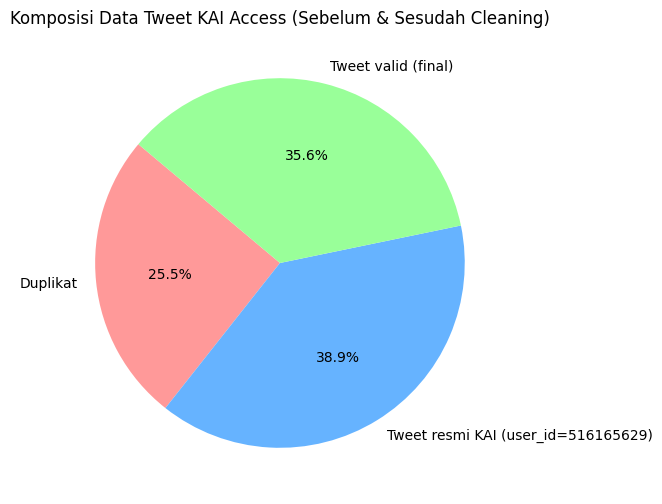

In [13]:
import matplotlib.pyplot as plt

# Data untuk pie chart
labels = [
    "Duplikat",
    "Tweet resmi KAI (user_id=516165629)",
    "Tweet valid (final)"
]
sizes = [
    before_dedup - after_dedup,         # duplikat
    before_filter - after_filter,       # tweet KAI Access
    len(merged)                         # tweet pengguna valid
]
colors = ["#ff9999","#66b3ff","#99ff99"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Komposisi Data Tweet KAI Access (Sebelum & Sesudah Cleaning)")
plt.show()


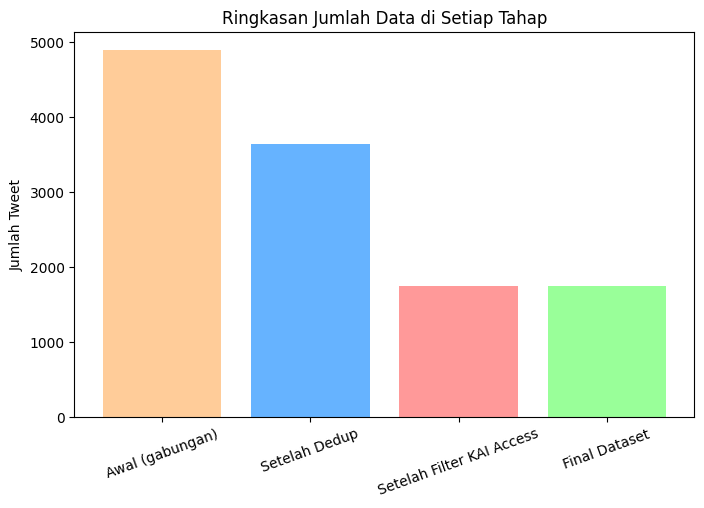

In [14]:
# Bar chart ringkasan
counts = {
    "Awal (gabungan)": before_dedup,
    "Setelah Dedup": after_dedup,
    "Setelah Filter KAI Access": after_filter,
    "Final Dataset": len(merged)
}

plt.figure(figsize=(8,5))
plt.bar(counts.keys(), counts.values(), color=["#ffcc99","#66b3ff","#ff9999","#99ff99"])
plt.ylabel("Jumlah Tweet")
plt.title("Ringkasan Jumlah Data di Setiap Tahap")
plt.xticks(rotation=20)
plt.show()


Rata-rata panjang teks (karakter): 157.53356282271946
Rata-rata panjang teks (kata): 23.843947217441194


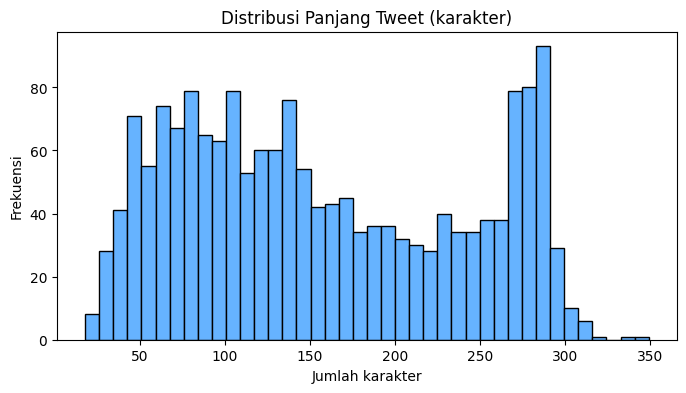

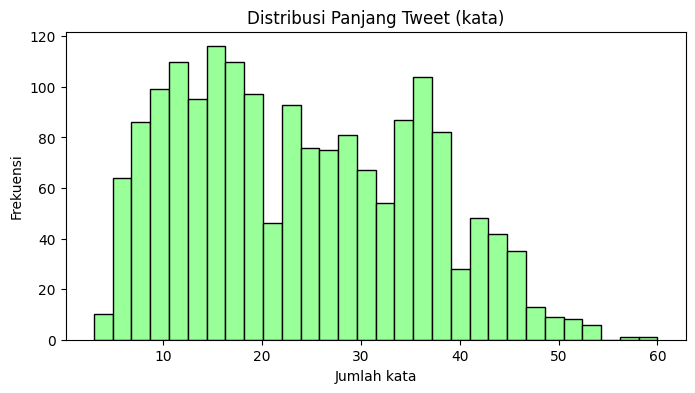

In [15]:
# === Step 11: Distribusi Panjang Teks Tweet ===

if "full_text" in merged.columns:
    merged["char_length"] = merged["full_text"].astype(str).str.len()
    merged["word_count"] = merged["full_text"].astype(str).str.split().str.len()

    print("Rata-rata panjang teks (karakter):", merged["char_length"].mean())
    print("Rata-rata panjang teks (kata):", merged["word_count"].mean())

    # Histogram karakter
    plt.figure(figsize=(8,4))
    plt.hist(merged["char_length"], bins=40, color="#66b3ff", edgecolor="black")
    plt.title("Distribusi Panjang Tweet (karakter)")
    plt.xlabel("Jumlah karakter")
    plt.ylabel("Frekuensi")
    plt.show()

    # Histogram kata
    plt.figure(figsize=(8,4))
    plt.hist(merged["word_count"], bins=30, color="#99ff99", edgecolor="black")
    plt.title("Distribusi Panjang Tweet (kata)")
    plt.xlabel("Jumlah kata")
    plt.ylabel("Frekuensi")
    plt.show()


20 Kata paling sering muncul:
selamatpagimohonmaafkakuntukinformasipemesanantiketkalokalkeberangkatantanggal1november2025yangbelumtersediatelahkamisampaikankeunitterkaityaapabilabelumtersediapadaaplikasiaccessbykaikamisarankanceksecaraberkalayakaktks: 7
tiketnatarujugamulailarismanisrelasifavoritpasarsenensurabayapasarsenenmalangdanpurwokertopasarsenenjangansampaikehabisancektiketmulewataccessbykai: 5
mohonmaafkakapabilabelumtersediapadaaplikasiaccessbykaikamisarankanceksecaraberkalayakaktks: 4
halokakkalaubutuhjasawarkeretadiaplikasikaiaccessbisadmatauwayakak: 3
hallokenapaaappkaiaccesstidakbisadigunakanyaa: 2
ygreplykebanyakanmisinformasiutkkeretacepatemangmasihmanualharuskeloketutkrefundpembatalanreschedulekloutkkeretakaijarakjauhsptargowilisdllbsreschedulerefundpembatalandariaplikasikaiaccessfyigwbukanpekerjakai: 2
selamatmalamkakpemesanantiketkalokaldapatdilakukanmelaluiaplikasimulaih7sebelumkeberangkatanyasilakandapatmelakukanpengecekansecaraberkalapadakaiaccessyakaktks: 2
selama

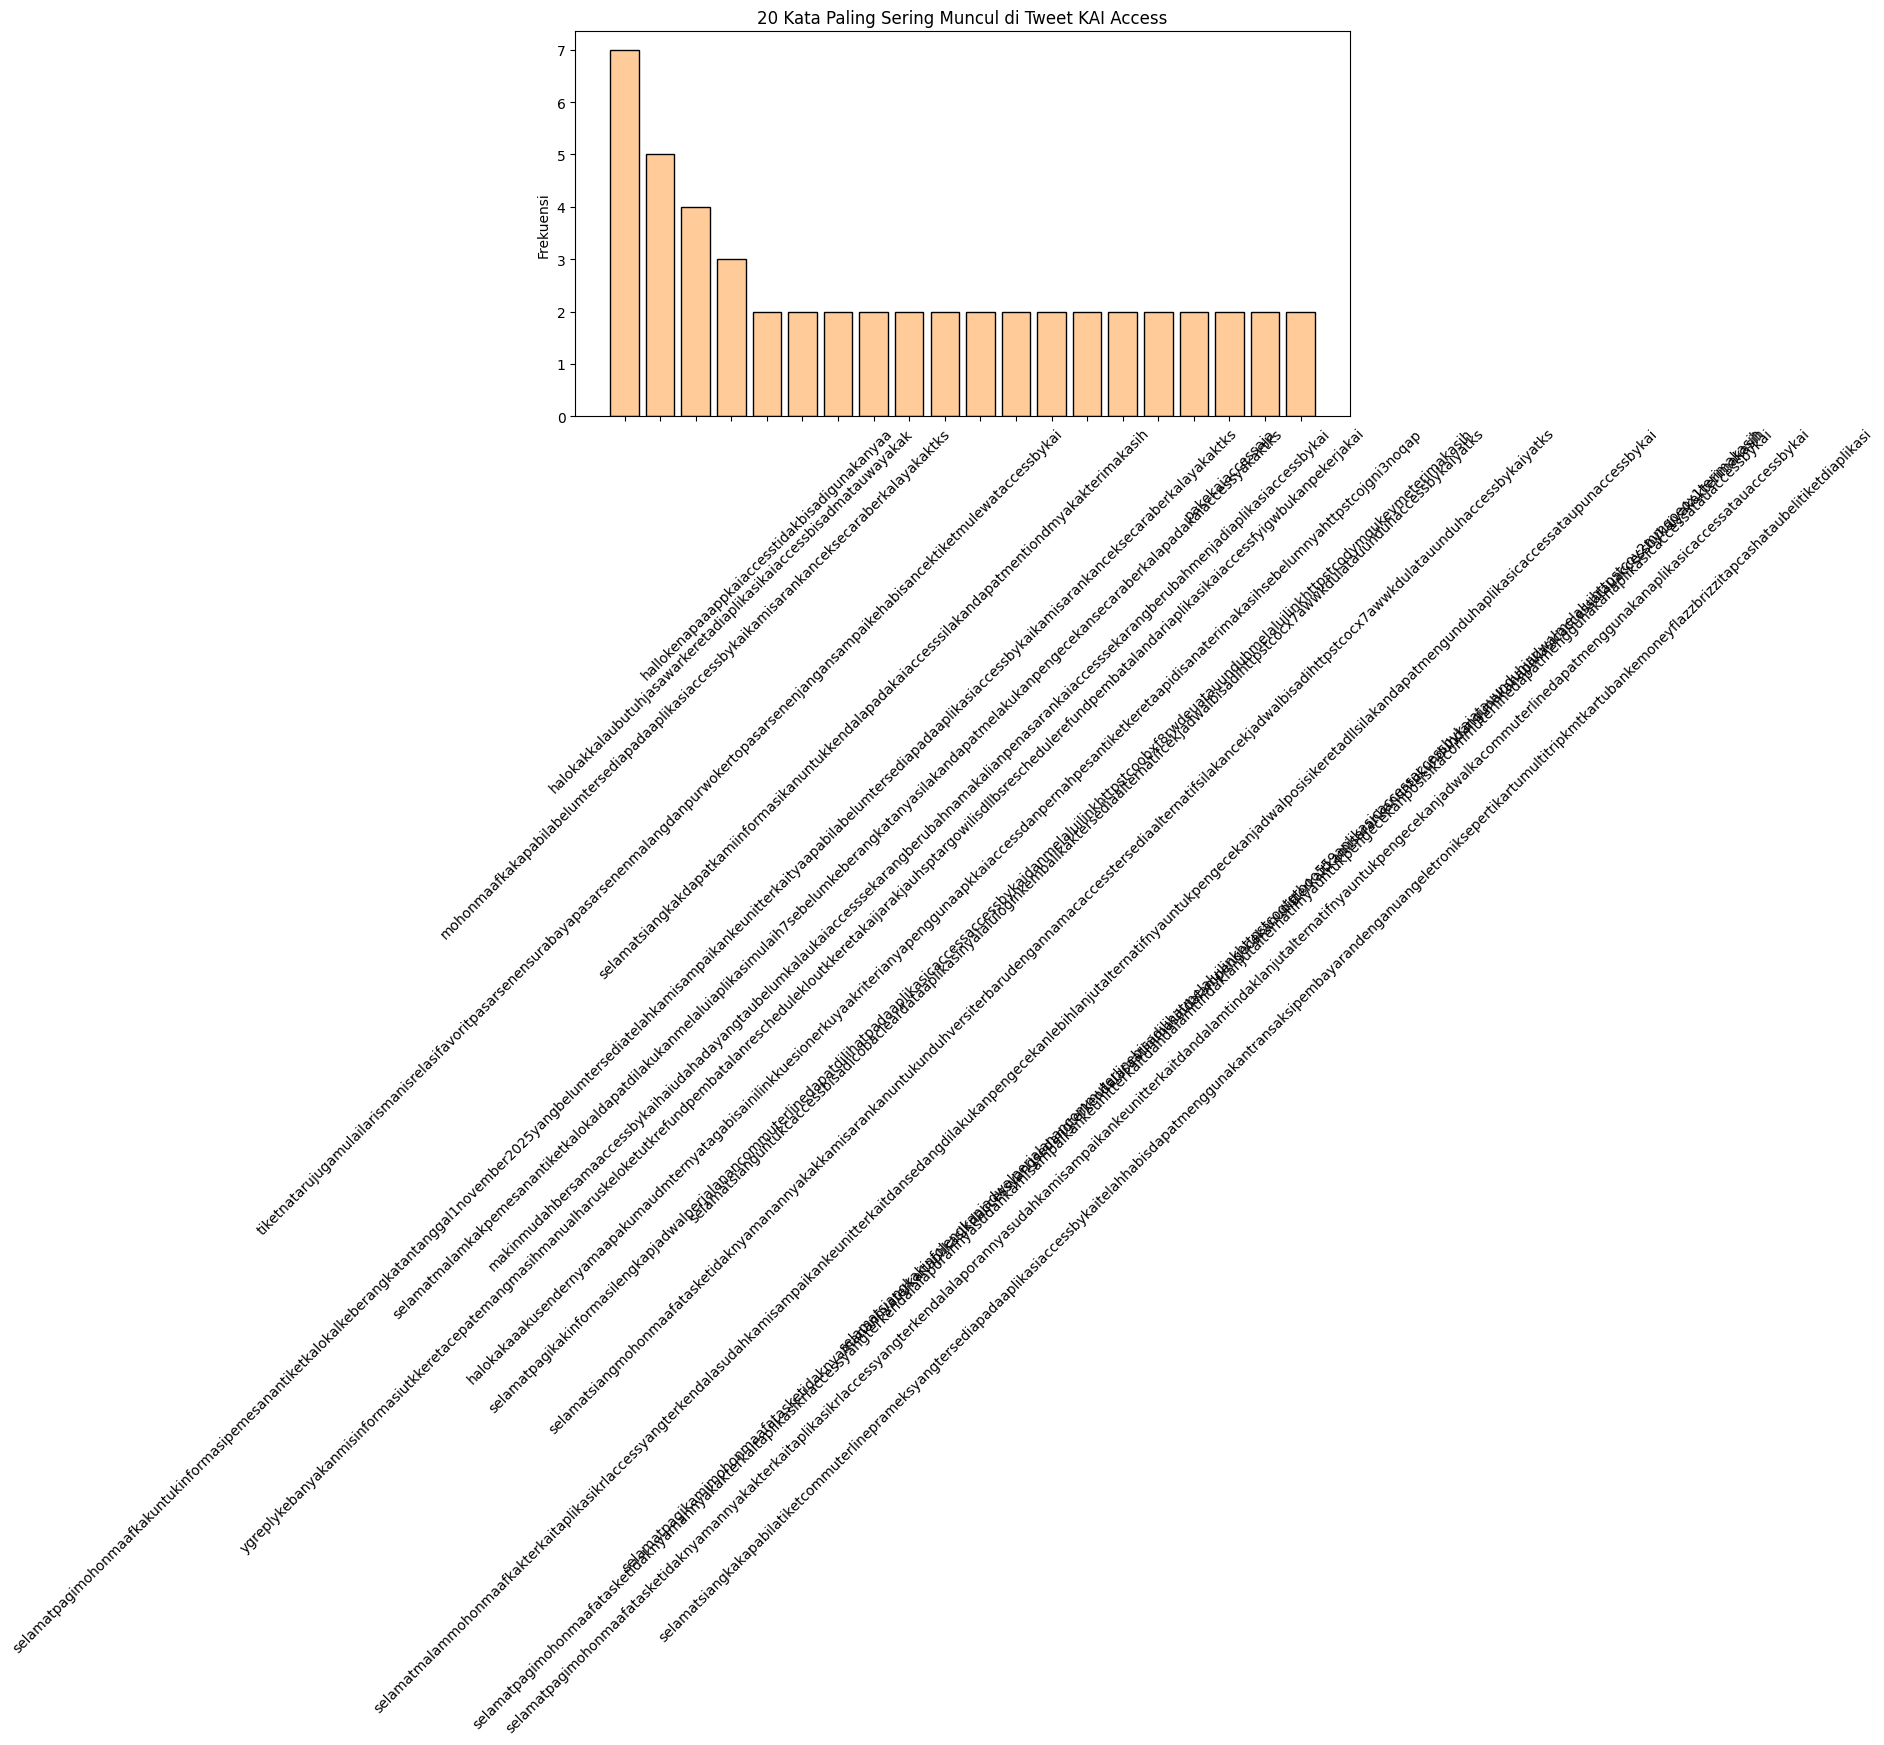

In [16]:
# === Step 12: Word Frequency (Top Keywords) ===

from collections import Counter
import re

def tokenize(text):
    # Hapus URL, mention, hashtag, tanda baca sederhana
    text = re.sub(r"http\\S+|www\\S+", "", str(text))
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)  # hapus mention
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)  # hapus hashtag
    text = re.sub(r"[^0-9A-Za-zÀ-ÿ\\s]", "", text)  # hanya huruf/angka/spasi
    tokens = text.lower().split()
    return tokens

# Tokenisasi semua tweet
all_tokens = []
merged["full_text"].dropna().apply(lambda x: all_tokens.extend(tokenize(x)))

# Hitung frekuensi kata
counter = Counter(all_tokens)

# Ambil 20 kata teratas
top_words = counter.most_common(20)
print("20 Kata paling sering muncul:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Visualisasi bar chart
words, freqs = zip(*top_words)
plt.figure(figsize=(10,5))
plt.bar(words, freqs, color="#ffcc99", edgecolor="black")
plt.title("20 Kata Paling Sering Muncul di Tweet KAI Access")
plt.xticks(rotation=45)
plt.ylabel("Frekuensi")
plt.show()


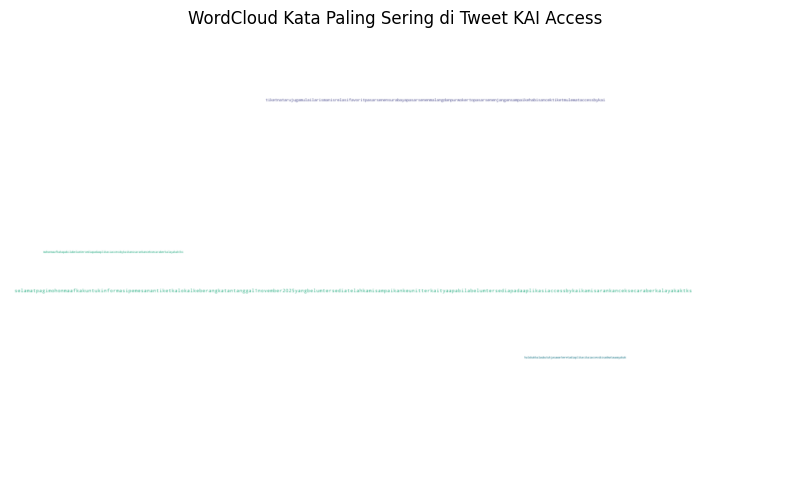

In [19]:
# === Step 12: Word Frequency dengan WordCloud ===

from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def tokenize(text):
    # Hapus URL, mention, hashtag, tanda baca sederhana
    text = re.sub(r"http\\S+|www\\S+", "", str(text))
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)  # hapus mention
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)  # hapus hashtag
    text = re.sub(r"[^0-9A-Za-zÀ-ÿ\\s]", "", text)  # hanya huruf/angka/spasi
    tokens = text.lower().split()
    return tokens

# Tokenisasi semua tweet
all_tokens = []
merged["full_text"].dropna().apply(lambda x: all_tokens.extend(tokenize(x)))

# Hitung frekuensi kata
counter = Counter(all_tokens)

# Buat wordcloud
wordcloud = WordCloud(
    width=1000, height=600, background_color="white",
    max_words=100, colormap="viridis"
).generate_from_frequencies(counter)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Kata Paling Sering di Tweet KAI Access")
plt.show()
